# MOBILE PRICE PREDICTION


__The main objective is to predict the price of a mobile phone using its parameters - resolution, brand, size, weight, imaging quality, RAM, battery and cpu power__

In [248]:
import pandas as pd
import os

datapath = 'C:/Users/Cellphone.csv'



df =pd.read_csv(datapath)


df.head()




,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


> The data set consists of various columns such as product Id , sale ,resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features_

In [250]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [251]:
df = df.rename(columns={'resoloution':'Resolution'}) #Correct the spelling of resolution column
df

,Product_id,Price,Sale,weight,Resolution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [252]:
df.isnull().sum() #sum of all the null values in the dataframe

Product_id      0
Price           0
Sale            0
weight          0
Resolution      0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [253]:
df['Product_id'].unique().tolist()

[203,
 880,
 40,
 99,
 947,
 774,
 1103,
 289,
 605,
 622,
 1058,
 1120,
 187,
 315,
 860,
 990,
 104,
 776,
 10,
 1145,
 1020,
 1339,
 662,
 575,
 907,
 162,
 974,
 739,
 738,
 804,
 43,
 1248,
 93,
 563,
 577,
 218,
 56,
 198,
 14,
 857,
 937,
 66,
 1221,
 1011,
 1026,
 1216,
 237,
 763,
 131,
 1062,
 841,
 1143,
 183,
 1080,
 827,
 133,
 832,
 637,
 64,
 30,
 409,
 143,
 798,
 460,
 1327,
 1198,
 1112,
 696,
 1089,
 497,
 301,
 377,
 701,
 1161,
 32,
 1137,
 851,
 826,
 290,
 1131,
 1206,
 1296,
 856]

In [254]:
df =df.drop_duplicates(subset="Product_id") #Remove duplicates in the product_id column

In [255]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'Resolution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [256]:
features = df.corr()['Price'].sort_values()
features

thickness      -0.709908
weight          0.143802
Product_id      0.170405
Sale            0.305800
Resolution      0.403869
battery         0.558053
Front_Cam       0.674465
cpu core        0.688402
cpu freq        0.729808
RearCam         0.740738
internal mem    0.778957
ppi             0.814855
ram             0.896040
Price           1.000000
Name: Price, dtype: float64

<AxesSubplot:>

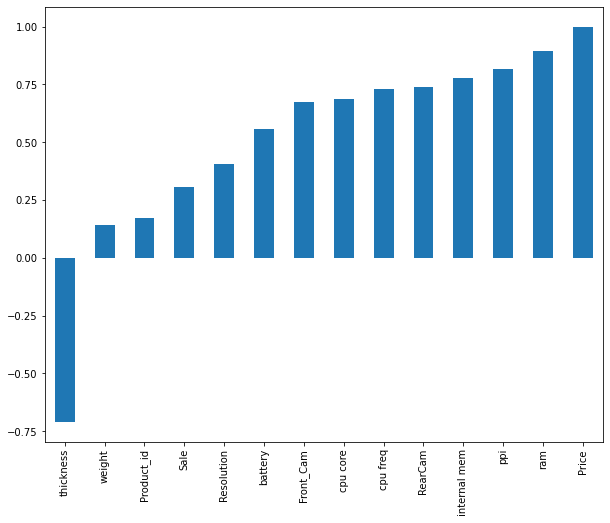

In [257]:
features.plot(kind='bar',figsize=(10,8))

In [258]:
MobileValues = df.select_dtypes(include = ['float64', 'int64'])
MobileValues_corr = MobileValues.corr()['Price'][2:]
TopFeatures = MobileValues_corr[abs(MobileValues_corr)>0.5].sort_values(ascending = False)

print("{} features are strongly correlated with Price: \n{}".format(len(TopFeatures),TopFeatures))



9 features are strongly correlated with Price: 
ram             0.896040
ppi             0.814855
internal mem    0.778957
RearCam         0.740738
cpu freq        0.729808
cpu core        0.688402
Front_Cam       0.674465
battery         0.558053
thickness      -0.709908
Name: Price, dtype: float64


<AxesSubplot:xlabel='Price'>

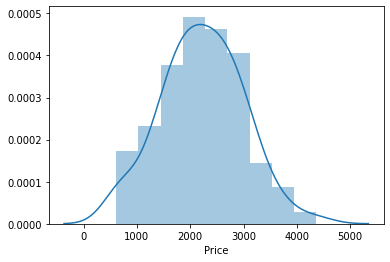

In [259]:
import seaborn as sns

sns.distplot(df['Price'])



_Fairly Symmetrical Bell Curve ( Skewness between -0.5 and 0.5)_

In [260]:
print("Skewness: %f" % df['Price'].skew())

Skewness: 0.053899


In [261]:
from scipy.stats import norm
from scipy import stats

In [262]:
df['ram_stats'] = stats.zscore(df['ram'])
df[['ram','ram_stats']].describe().round(3)

C:\Users\moyin\AppData\Local\Temp\ipykernel_23132\1798031430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ram_stats'] = stats.zscore(df['ram'])


,ram,ram_stats
count,83.000,83.000
mean,2.202,-0.000
std,1.604,1.006
min,0.000,-1.381
25%,1.000,-0.754
50%,2.000,-0.127
75%,3.000,0.501
max,6.000,2.382


_No outliers in the 'ram' column since the max value falls below +3_


In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

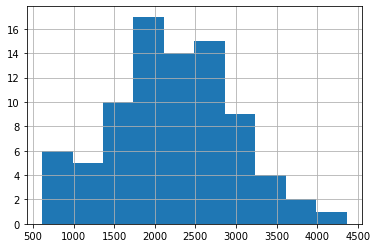

In [264]:
df['Price'].hist()

In [265]:
from scipy.stats.mstats import normaltest 
normaltest(df['Price'].values)

NormaltestResult(statistic=0.09385533767894014, pvalue=0.9541564103349417)

# Testing Linear Regression

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [267]:
lr = LinearRegression()

y_value = "Price"
X = df.drop(y_value, axis =  1)
y = df[y_value]

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr=lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

In [269]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)



In [270]:
lr=lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_lr = lr.predict(X_test_s)
r2_score(y_pred_lr,y_test)

0.8937505046734234

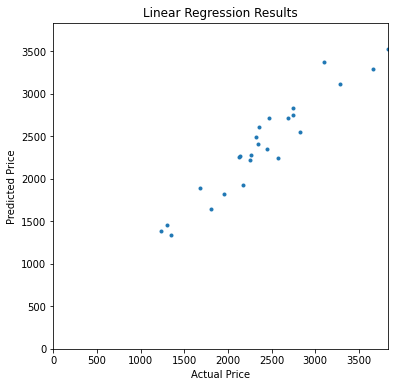

In [271]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_lr, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

# Polynomial Features

In [272]:
pf = PolynomialFeatures(degree=2,include_bias=False)
X_pf = pf.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

In [273]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_pf = lr.predict(X_test_s)

In [274]:
r2_score(y_pred_pf,y_test)

0.8277381417892475

# Regularized Regression

In [275]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


X_pf_ss = s.fit_transform(X_pf)
las = Lasso()
las.fit(X_pf_ss,y)

c:\Users\moyin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.488e+04, tolerance: 4.784e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [276]:
X_train_s = s.fit_transform(X_train)
las.fit(X_train_s, y_train)
X_test_s = s.fit_transform(X_test)
y_pred_lasso = las.predict(X_test_s)

r2_score(y_pred_lasso,y_test)


c:\Users\moyin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.943e+04, tolerance: 2.748e+03
  model = cd_fast.enet_coordinate_descent(


0.7942714473762076

In [277]:
las1 = Lasso(alpha = 1, max_iter=10000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las1.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred_lasso1 = las1.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 1:", r2_score(y_pred_lasso1, y_test))

r2 score for alpha = 1: 0.9093369013887462


In [278]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=1)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_ridge001 = r.predict(X_test_s)


print("r2 score for Ridge regression alpha = 0.01:", r2_score(y_pred_ridge001, y_test))


r2 score for Ridge regression alpha = 0.01: 0.885132375792934


In [279]:
y_pred_r = r.predict(X_pf_ss)
print(r2_score(y, y_pred_r))

y_pred_l = las1.predict(X_pf_ss)
print(r2_score(y, y_pred_l))

0.946759502273373
0.9539148037708497


Based on the R2 score, the lasso regression model is better than the ridge regression model.

_Measuring the root mean square error of the three models_

In [280]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [281]:
from sklearn.linear_model import LassoCV

lasso_rmse = rmse(y_test,y_pred_lasso1)

ridge_rmse = rmse(y_test,y_pred_ridge001)

linearRegression_rmse = rmse(y_test,y_pred_lr)


rmse_vals = [linearRegression_rmse, ridge_rmse, lasso_rmse]

labels = ['Linear','Ridge','Lasso']

rmse_df = pd.Series(rmse_vals,index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)

rmse_df

,RMSE
Linear,1118.510281
Ridge,264.619190
Lasso,244.527718


`Recommenations`

I would recommend that the lasso regression model was the best model for predicting the mobile price. I came to this conclusion based on two observations. First, the R2 score for each model was calculated (linear regression using polynomial features, lasso regression, and ridge regression). The R2 score for the lasso regression was the highest, with a value of 0.90 compared to the other two. Secondly, the root-mean-square error for the lasso regression was the least among the other models.

Summary Key Findings and Insights

_According to the analysis conducted, I concluded that the phone's RAM, pixel density(PPI), internal memory, and CPU frequency are the significant features that determine the price of any mobile phone._